### A) Знакомство со структурой датасетов

In [155]:
import pandas as pd
import seaborn as sns

In [156]:
df_user = pd.read_csv('user_data.csv')
df_logs = pd.read_csv('logs.csv')

In [157]:
print(df_user.shape, df_logs.shape)

(2954, 3) (4500, 4)


In [158]:
df = df_user.merge(df_logs, how='outer', on=['client'])
df.head(10)

,client,premium,age,success,platform,time
0,46346,False,58.0,True,phone,1585452839
1,4391,False,55.0,False,phone,1585409861
2,27372,False,64.0,False,phone,1585446018
3,11989,False,44.0,True,computer,1585403698
4,60664,False,49.0,True,phone,1585406918
5,78605,False,36.0,True,tablet,1585430330
6,78605,False,36.0,False,phone,1585461704
7,14477,False,34.0,False,phone,1585442706
8,77451,False,49.0,True,phone,1585444298
9,35036,False,48.0,True,phone,1585465012


In [159]:
df.shape

(4500, 6)

In [160]:
df.dtypes

client        int64
premium      object
age         float64
success        bool
platform     object
time          int64
dtype: object

In [161]:
df.isna().sum()

client         0
premium     1061
age         1061
success        0
platform       0
time           0
dtype: int64

In [162]:
df_without_na = df.dropna()

In [163]:
df.describe()

,client,age,time
count,4500.000000,3439.000000,4.500000e+03
mean,50998.758000,44.222448,1.585440e+09
std,28374.472495,14.692909,2.314866e+04
min,40.000000,20.000000,1.585400e+09
25%,27056.500000,31.000000,1.585420e+09
50%,52659.000000,44.000000,1.585440e+09
75%,76001.250000,57.000000,1.585461e+09
max,99993.000000,69.000000,1.585480e+09


### B) Поиск клиента с наибольшим количеством успешных операций

In [164]:
def get_biggest_group(original: pd.DataFrame, 
                      expression: str, 
                      group_elements: list[str]) -> pd.DataFrame:    
    """
    Separates dataframe on groups, by specific elements
    and returns group with biggest member count
    
    Args:
        expression (str) - expression for selecting specific rows from dataset
        elements_groups (list[str]) - list of columns which value combination will create one group     
    """
    group_elements_count = (original.query(expression)
                            .groupby(group_elements)
                            .agg({'success' : 'count'})
                            .rename({'success' : 'number'}, axis=1)
                            .reset_index())
    
    """
    #Old code
    max_count = pd.DataFrame({'number' : [group_elements_count['number'].max()]})
    max_client = group_elements_count.merge(max_count, how='inner', on='number')
    """
    max_client = group_elements_count[group_elements_count.number == group_elements_count['number'].max()]\
                 .reset_index(drop=True)
    return max_client

In [165]:
get_biggest_group(df, 'success == True', ['client'])

,client,number
0,12179,41
1,28719,41
2,36165,41
3,52870,41
4,61468,41
5,61473,41
6,78349,41
7,82563,41
8,92584,41


### C) Поиск платформы с наибольшим количеством успешных операций

In [166]:
get_biggest_group(df, 'success == True', ['platform'])

,platform,number
0,phone,2019


### D) Поиск платформы с наибольшим количеством премиальных пользователей

In [167]:
get_biggest_group(df, 'premium == True', ['platform'])

,platform,number
0,phone,246


### E) Распределение возрастов премиальных/непремиальных клиентов

In [168]:
premium_users = df.query("premium == True")
non_premium_users = df.query("premium == False")

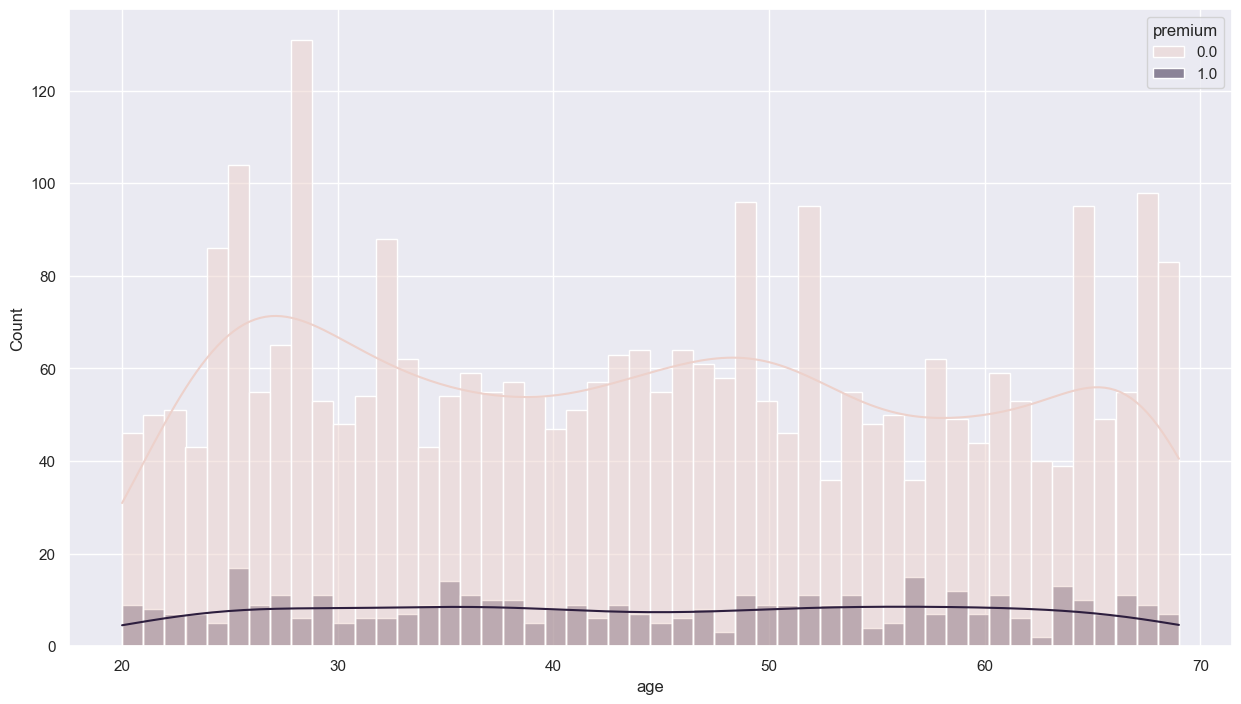

In [169]:
sns.set(rc={'figure.figsize':(15, 8.27)})
age_deviation = sns.histplot(data=df, x='age',stat='count', kde=True, bins=50, hue='premium')

__Распределение пользователей с премиумом__

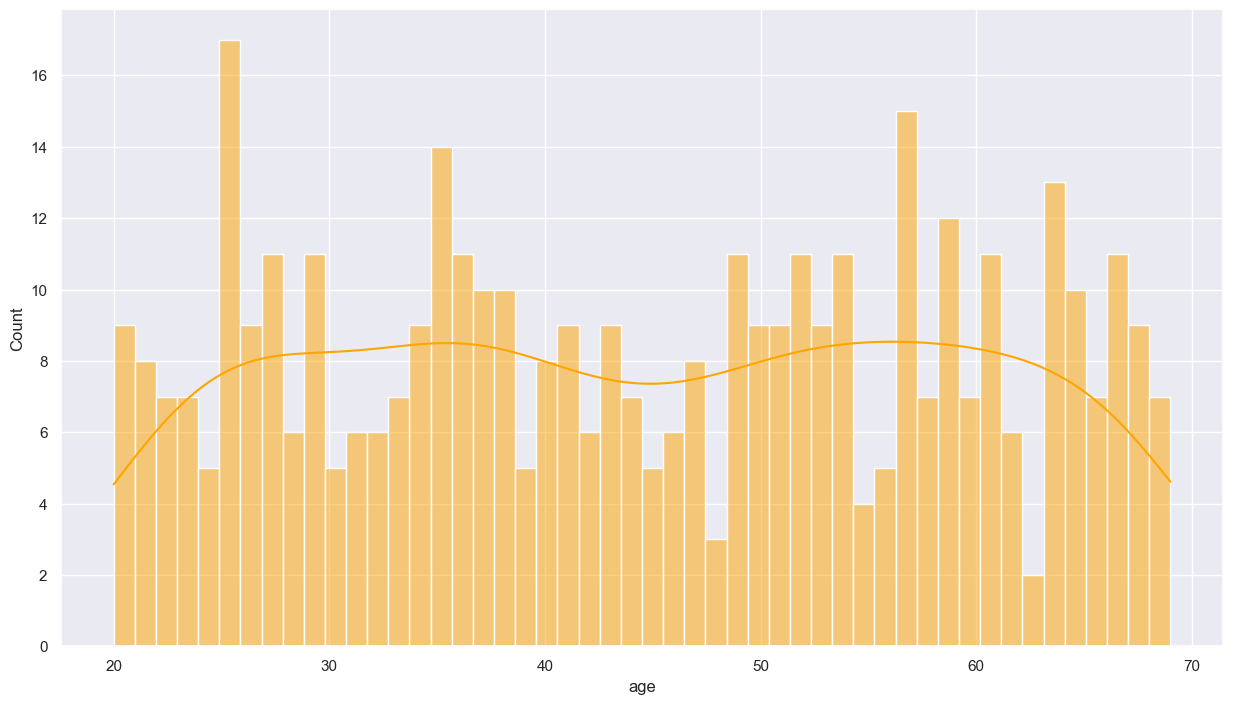

In [170]:
sns.set(rc={'figure.figsize':(15,8.27)})
premium_deviation = sns.histplot(data=premium_users, x='age',stat='count', kde=True,  bins=50, color='orange')

__Распределение пользователей без премиума__

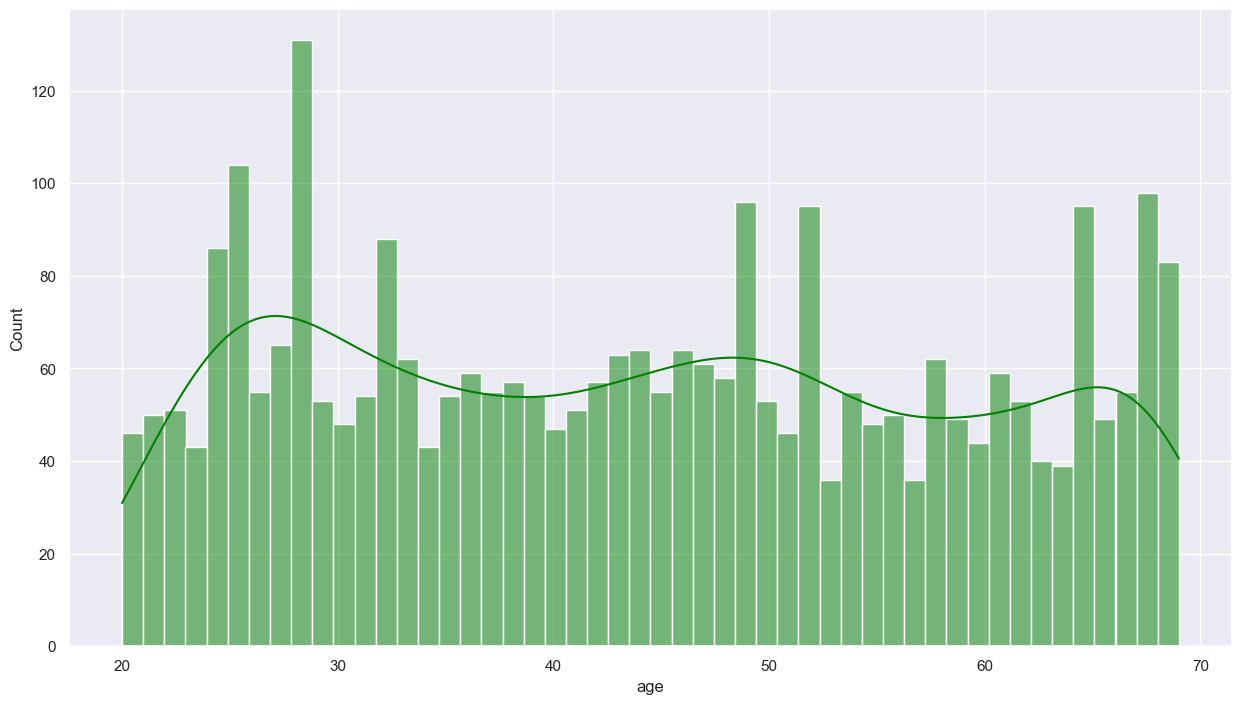

In [171]:
sns.set(rc={'figure.figsize':(15,8.27)})
non_premium_deviation = sns.histplot(data=non_premium_users, x='age',stat='count', kde=True,  bins=50, color='green')

### F) Распределение числа успешных операций

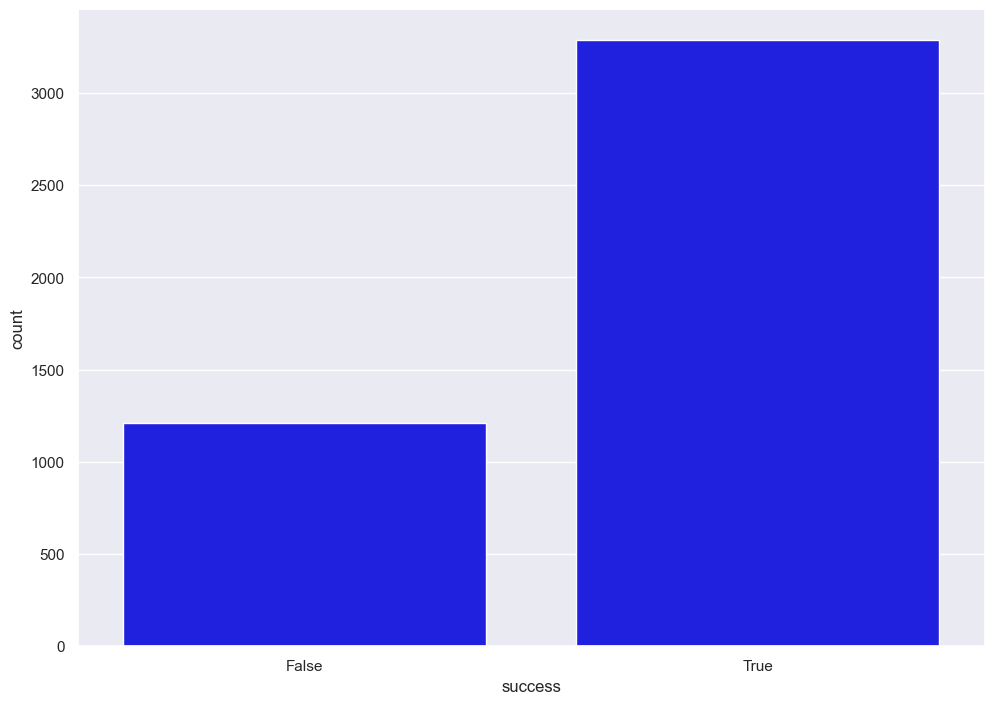

In [172]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
operations_deviation = sns.countplot(data=df, x='success', color='blue')

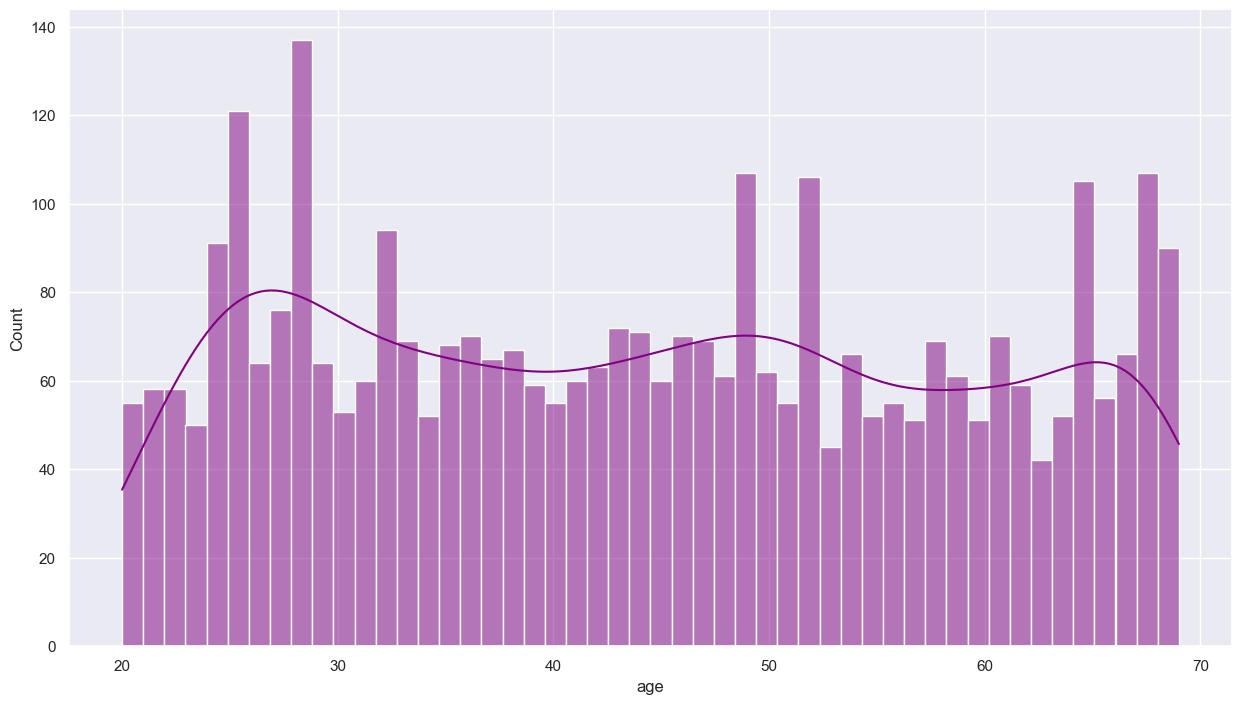

In [173]:
sns.set(rc={'figure.figsize':(15,8.27)})
success_operations = df.query('success == True')
success_deviation = sns.histplot(data=df, stat='count', bins=50, kde=True, x='age', color='purple')

### G) Количество успешных операций в зависимости от возраста для платформы computer

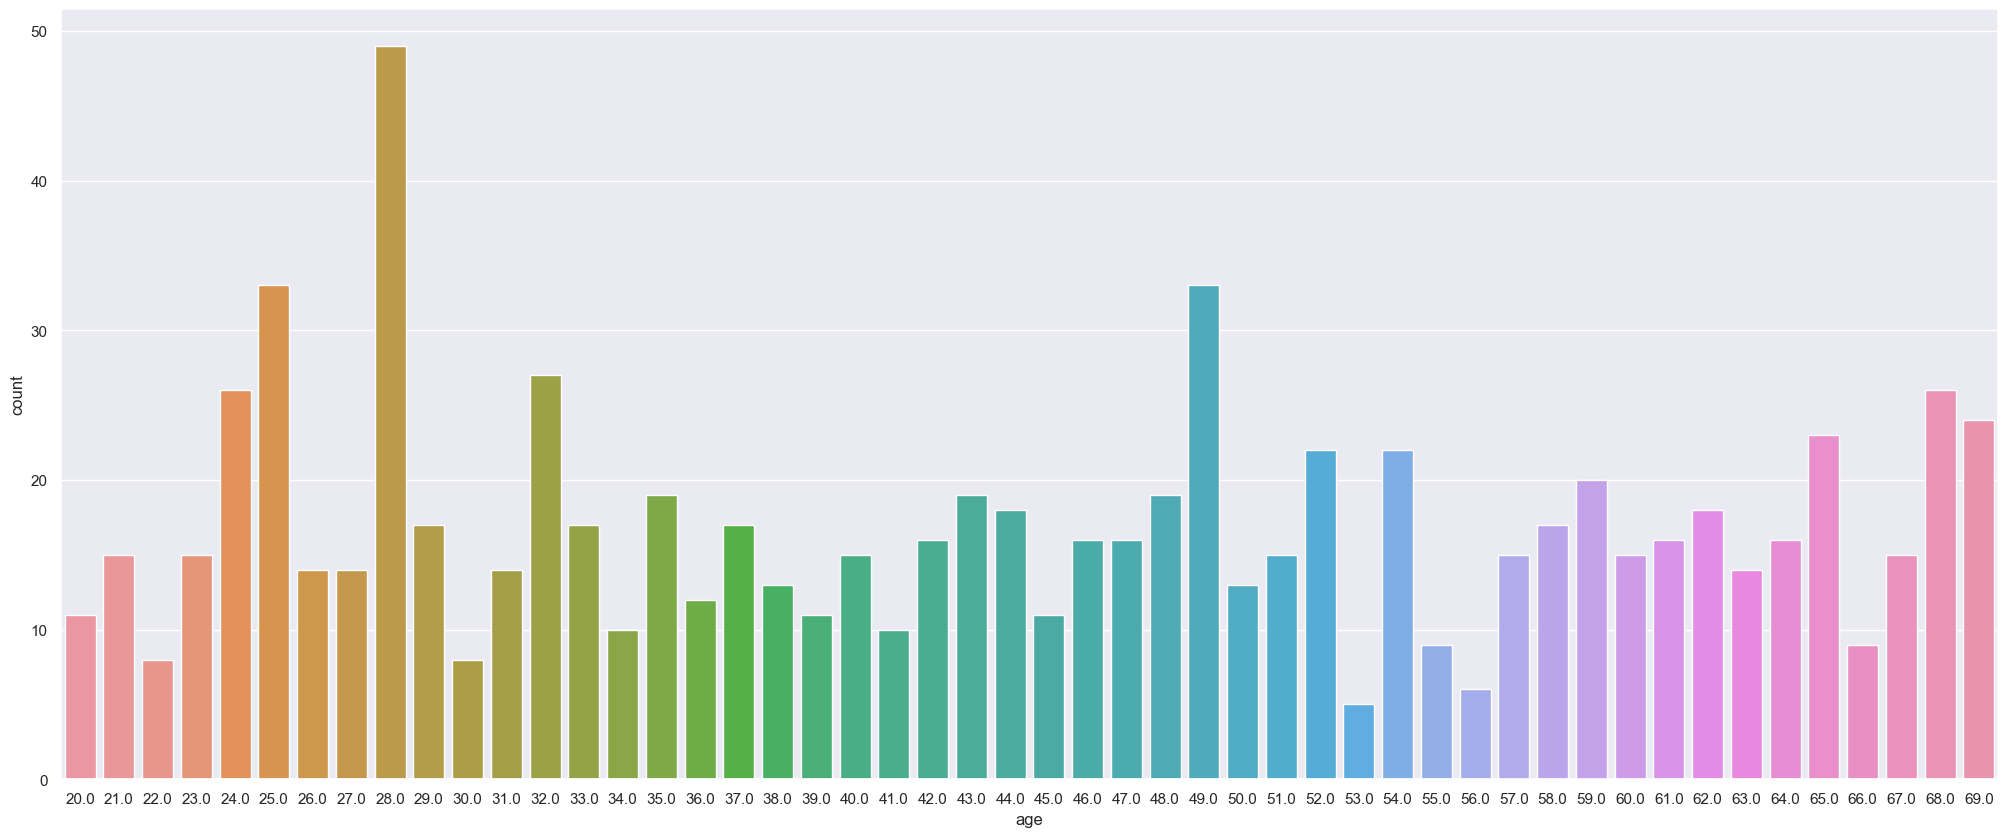

In [176]:
sns.set(rc={'figure.figsize':(25,10)})
computer_success_operations = df.query("success == True and platform == 'computer'")
computer_success_operations_plot = sns.countplot(data=computer_success_operations, x="age")
